In [1]:
dados ='/home/dev/PycharmProjects/FallDetection/conv/mobiact/Conv1d/Dominio da Frequencia/dados_freq.npy'
rotulos ='/home/dev/PycharmProjects/FallDetection/conv/mobiact/rotulos_freq.npy'

import numpy as np
X = np.load(dados)
y = np.load(rotulos)

In [2]:
def rede_cnn_1d(X,y,i):

    from sklearn.model_selection import train_test_split

    # Dividindo os dados em conjunto de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

    # Dividindo o conjunto de treinamento em conjunto de treinamento e validação
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

    from keras.utils import to_categorical
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    y_val = to_categorical(y_val)

    from tensorflow import keras
    from keras.models import Sequential
    from keras.layers import Dense, Dropout,Conv1D,Flatten,MaxPooling1D

    kernel_size = 3

    model = keras.Sequential()


    model.add(Conv1D(filters=278, kernel_size=kernel_size, activation='relu', input_shape=(200,1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.4))

    model.add(Conv1D(filters=556, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(110, activation='relu'))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    historico = model.fit(X_train,y_train,batch_size= 32,epochs = 20, validation_data = (X_val,y_val),verbose =1)

    model.summary()

    import matplotlib.pyplot as plt


    acuracia_treino = historico.history['accuracy'] 
    acuracia_val = historico.history['val_accuracy']

    epochs = range(1, len(acuracia_treino)+1) 

    plt.plot(epochs,acuracia_treino, "-g", label="Acurácia Dados de Treino") 
    plt.plot(epochs,acuracia_val, "-b", label = "Acurácia Dados de Validação")
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Acurácia')
    plt.show()

    import numpy as np
    import matplotlib.pyplot as plt
    import itertools
    from sklearn.metrics import confusion_matrix

    # Obtendo as probabilidades das classes previstas
    y_pred_probs = model.predict(X_test)

    # Obtendo as classes previstas
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Obtendo as classes reais
    y_true = np.argmax(y_test, axis=1)

    # Calculando a matriz de confusão
    cm = confusion_matrix(y_true, y_pred)

    # Plotando a matriz de confusão
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Matriz de Confusão')
    plt.colorbar()
    tick_marks = np.arange(0, 2)
    plt.xticks(tick_marks, rotation=90)
    plt.yticks(tick_marks)

    # Adicionando os números nas células da matriz
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Rótulo Real')
    plt.xlabel('Rótulo Previsto')
    plt.show()

    from sklearn.metrics import classification_report


    target_names = np.arange(0, 2).astype(str)
    print(classification_report(y_true, y_pred, target_names=target_names))
    
    from sklearn.metrics import matthews_corrcoef
    mcc = matthews_corrcoef(y_true, y_pred)
    print(f'MCC = {mcc}')
    
    from sklearn.metrics import roc_curve, roc_auc_score
    # Calcula a AUC
    roc_auc = roc_auc_score(y_true, y_pred)
    # Calcula a curva ROC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    # Plota a curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    
    # Salvar o modelo em formato HDF5
    model.save(f'Cnn1D_tempo_freq_{i}.h5')






2023-07-26 13:47:42.303119: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-26 13:47:42.377937: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-26 13:47:42.379251: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-26 13:47:44.088096: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-26 13:47:46.030796: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Do

Epoch 1/20
302/302 [==============================] - 58s 186ms/step - loss: 0.0912 - accuracy: 0.9750 - val_loss: 0.0425 - val_accuracy: 0.9819
Epoch 2/20
302/302 [==============================] - 57s 187ms/step - loss: 0.0232 - accuracy: 0.9918 - val_loss: 0.0168 - val_accuracy: 0.9944
Epoch 3/20
302/302 [==============================] - 56s 187ms/step - loss: 0.0229 - accuracy: 0.9906 - val_loss: 0.0218 - val_accuracy: 0.9913
Epoch 4/20
302/302 [==============================] - 55s 184ms/step - loss: 0.0184 - accuracy: 0.9935 - val_loss: 0.0158 - val_accuracy: 0.9944
Epoch 5/20
302/302 [==============================] - 57s 187ms/step - loss: 0.0148 - accuracy: 0.9945 - val_loss: 0.0213 - val_accuracy: 0.9919
Epoch 6/20
302/302 [==============================] - 57s 190ms/step - loss: 0.0133 - accuracy: 0.9952 - val_loss: 0.0188 - val_accuracy: 0.9941
Epoch 7/20
302/302 [==============================] - 56s 186ms/step - loss: 0.0133 - accuracy: 0.9956 - val_loss: 0.0139 - val_ac

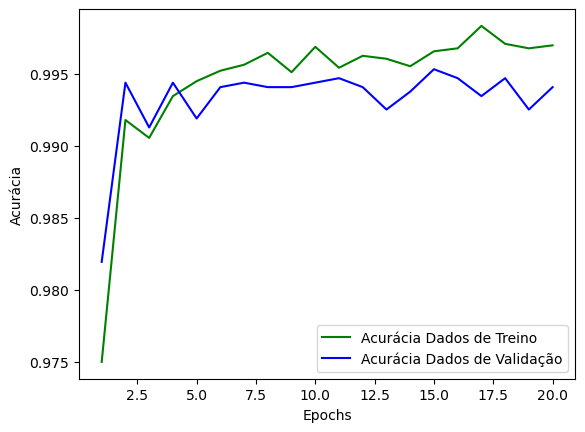

101/101 [==============================] - 3s 29ms/step


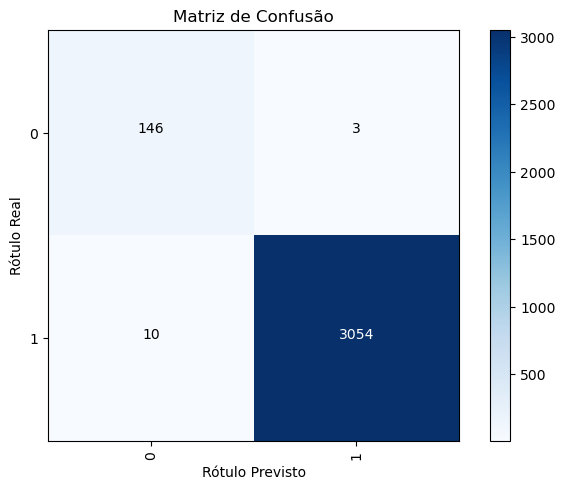

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       149
           1       1.00      1.00      1.00      3064

    accuracy                           1.00      3213
   macro avg       0.97      0.99      0.98      3213
weighted avg       1.00      1.00      1.00      3213

MCC = 0.9555317761382246


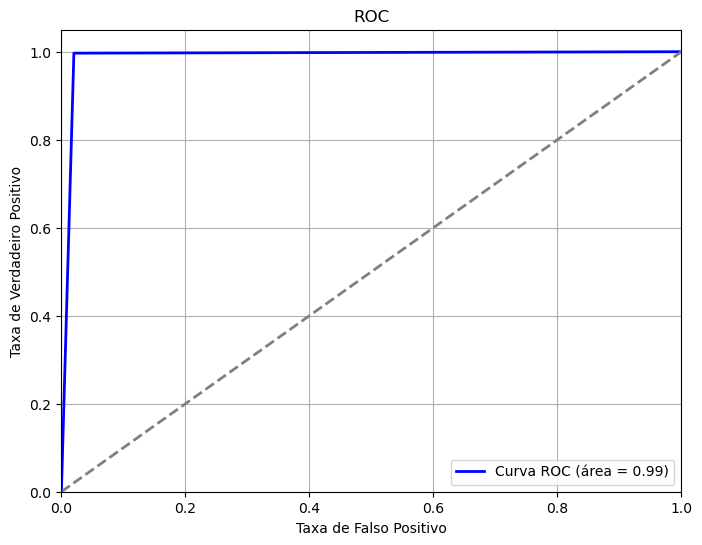

In [3]:
rede_cnn_1d(X,y,1)

Epoch 1/20
302/302 [==============================] - 55s 177ms/step - loss: 0.0836 - accuracy: 0.9778 - val_loss: 0.0504 - val_accuracy: 0.9795
Epoch 2/20
302/302 [==============================] - 55s 181ms/step - loss: 0.0415 - accuracy: 0.9910 - val_loss: 0.0309 - val_accuracy: 0.9941
Epoch 3/20
302/302 [==============================] - 52s 171ms/step - loss: 0.0300 - accuracy: 0.9918 - val_loss: 0.0187 - val_accuracy: 0.9938
Epoch 4/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0198 - accuracy: 0.9926 - val_loss: 0.0156 - val_accuracy: 0.9960
Epoch 5/20
302/302 [==============================] - 53s 175ms/step - loss: 0.0168 - accuracy: 0.9934 - val_loss: 0.0278 - val_accuracy: 0.9876
Epoch 6/20
302/302 [==============================] - 53s 176ms/step - loss: 0.0122 - accuracy: 0.9948 - val_loss: 0.0379 - val_accuracy: 0.9928
Epoch 7/20
302/302 [==============================] - 53s 175ms/step - loss: 0.0136 - accuracy: 0.9948 - val_loss: 0.0190 - val_ac

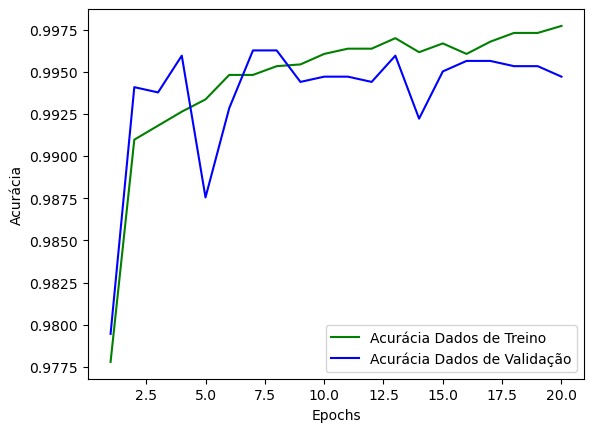

101/101 [==============================] - 3s 31ms/step


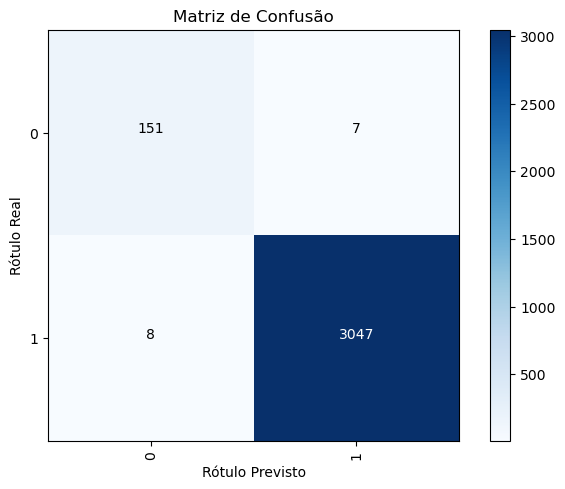

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       158
           1       1.00      1.00      1.00      3055

    accuracy                           1.00      3213
   macro avg       0.97      0.98      0.98      3213
weighted avg       1.00      1.00      1.00      3213

MCC = 0.9502312514913497


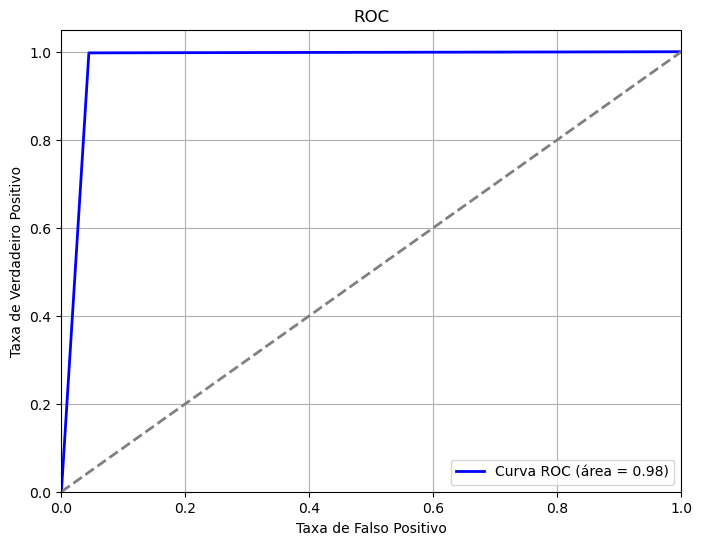

In [4]:
rede_cnn_1d(X,y,2)

Epoch 1/20
302/302 [==============================] - 56s 178ms/step - loss: 0.1040 - accuracy: 0.9752 - val_loss: 0.0395 - val_accuracy: 0.9922
Epoch 2/20
302/302 [==============================] - 53s 174ms/step - loss: 0.0432 - accuracy: 0.9890 - val_loss: 0.0353 - val_accuracy: 0.9916
Epoch 3/20
302/302 [==============================] - 52s 172ms/step - loss: 0.0356 - accuracy: 0.9924 - val_loss: 0.0262 - val_accuracy: 0.9960
Epoch 4/20
302/302 [==============================] - 52s 174ms/step - loss: 0.0320 - accuracy: 0.9920 - val_loss: 0.0274 - val_accuracy: 0.9935
Epoch 5/20
302/302 [==============================] - 52s 172ms/step - loss: 0.0284 - accuracy: 0.9926 - val_loss: 0.0241 - val_accuracy: 0.9938
Epoch 6/20
302/302 [==============================] - 53s 174ms/step - loss: 0.0234 - accuracy: 0.9948 - val_loss: 0.0202 - val_accuracy: 0.9950
Epoch 7/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0207 - accuracy: 0.9947 - val_loss: 0.0152 - val_ac

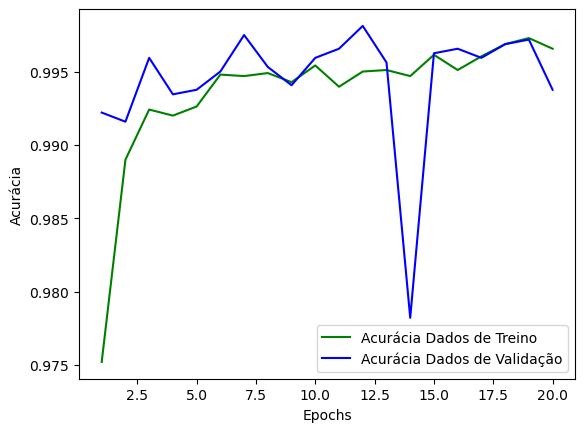

101/101 [==============================] - 3s 27ms/step


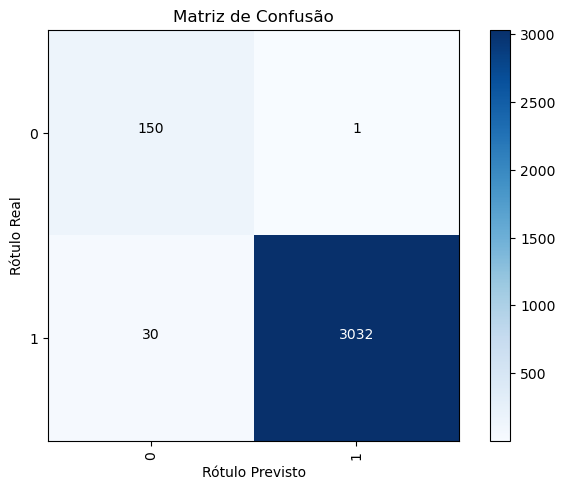

              precision    recall  f1-score   support

           0       0.83      0.99      0.91       151
           1       1.00      0.99      0.99      3062

    accuracy                           0.99      3213
   macro avg       0.92      0.99      0.95      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.9051661054561284


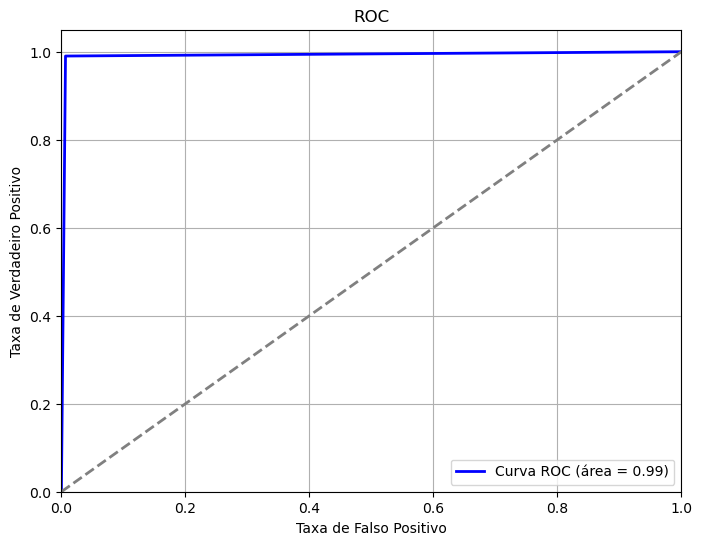

In [5]:
rede_cnn_1d(X,y,3)

Epoch 1/20
302/302 [==============================] - 54s 174ms/step - loss: 0.1075 - accuracy: 0.9728 - val_loss: 0.0358 - val_accuracy: 0.9916
Epoch 2/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0427 - accuracy: 0.9892 - val_loss: 0.0389 - val_accuracy: 0.9897
Epoch 3/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0348 - accuracy: 0.9914 - val_loss: 0.0284 - val_accuracy: 0.9932
Epoch 4/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0350 - accuracy: 0.9908 - val_loss: 0.0281 - val_accuracy: 0.9925
Epoch 5/20
302/302 [==============================] - 52s 172ms/step - loss: 0.0291 - accuracy: 0.9927 - val_loss: 0.0296 - val_accuracy: 0.9897
Epoch 6/20
302/302 [==============================] - 45s 148ms/step - loss: 0.0246 - accuracy: 0.9938 - val_loss: 0.0219 - val_accuracy: 0.9941
Epoch 7/20
302/302 [==============================] - 53s 174ms/step - loss: 0.0232 - accuracy: 0.9943 - val_loss: 0.0357 - val_ac

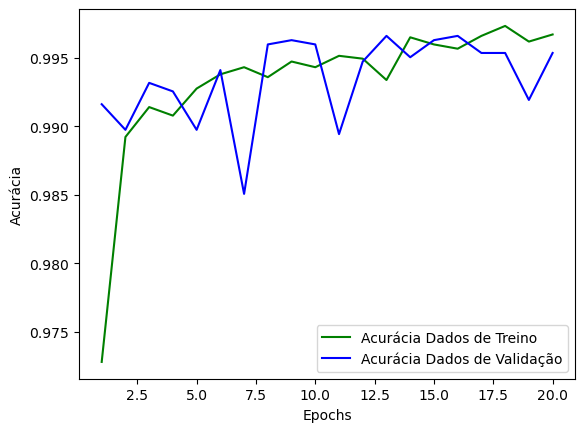

101/101 [==============================] - 3s 28ms/step


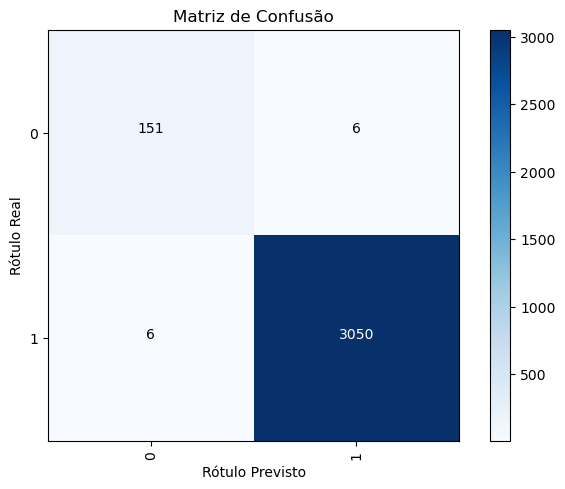

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       157
           1       1.00      1.00      1.00      3056

    accuracy                           1.00      3213
   macro avg       0.98      0.98      0.98      3213
weighted avg       1.00      1.00      1.00      3213

MCC = 0.9598200887051056


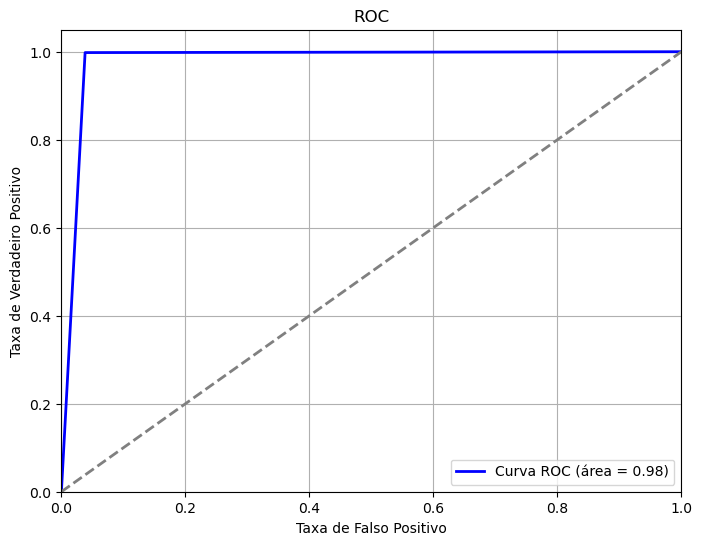

In [6]:
rede_cnn_1d(X,y,4)

Epoch 1/20
302/302 [==============================] - 55s 177ms/step - loss: 0.0817 - accuracy: 0.9790 - val_loss: 0.0189 - val_accuracy: 0.9944
Epoch 2/20
302/302 [==============================] - 54s 180ms/step - loss: 0.0243 - accuracy: 0.9909 - val_loss: 0.0283 - val_accuracy: 0.9876
Epoch 3/20
302/302 [==============================] - 57s 188ms/step - loss: 0.0202 - accuracy: 0.9918 - val_loss: 0.0110 - val_accuracy: 0.9956
Epoch 4/20
302/302 [==============================] - 56s 185ms/step - loss: 0.0166 - accuracy: 0.9940 - val_loss: 0.0146 - val_accuracy: 0.9928
Epoch 5/20
302/302 [==============================] - 59s 196ms/step - loss: 0.0162 - accuracy: 0.9939 - val_loss: 0.0163 - val_accuracy: 0.9925
Epoch 6/20
302/302 [==============================] - 55s 184ms/step - loss: 0.0132 - accuracy: 0.9953 - val_loss: 0.0077 - val_accuracy: 0.9975
Epoch 7/20
302/302 [==============================] - 55s 183ms/step - loss: 0.0163 - accuracy: 0.9937 - val_loss: 0.0227 - val_ac

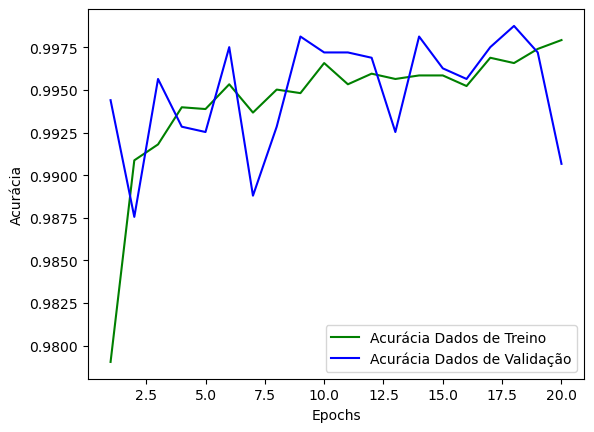

101/101 [==============================] - 3s 31ms/step


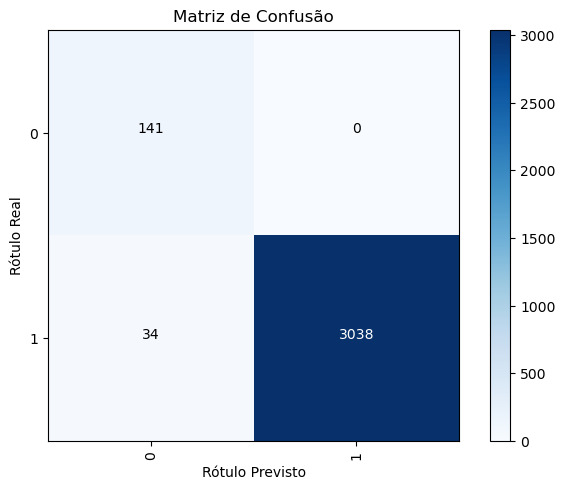

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       141
           1       1.00      0.99      0.99      3072

    accuracy                           0.99      3213
   macro avg       0.90      0.99      0.94      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.8926347937426594


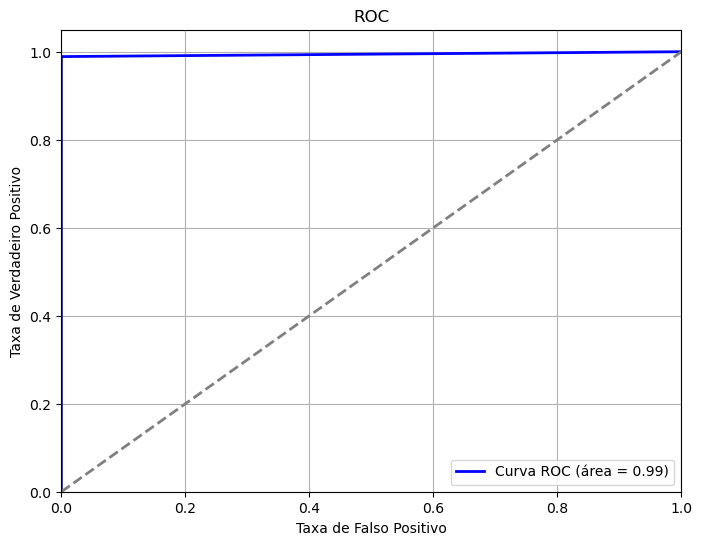

In [7]:
rede_cnn_1d(X,y,5)

Epoch 1/20
302/302 [==============================] - 58s 186ms/step - loss: 0.0671 - accuracy: 0.9823 - val_loss: 0.0228 - val_accuracy: 0.9928
Epoch 2/20
302/302 [==============================] - 55s 184ms/step - loss: 0.0197 - accuracy: 0.9932 - val_loss: 0.0287 - val_accuracy: 0.9925
Epoch 3/20
302/302 [==============================] - 57s 187ms/step - loss: 0.0198 - accuracy: 0.9921 - val_loss: 0.0138 - val_accuracy: 0.9944
Epoch 4/20
302/302 [==============================] - 54s 179ms/step - loss: 0.0175 - accuracy: 0.9936 - val_loss: 0.0189 - val_accuracy: 0.9947
Epoch 5/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0136 - accuracy: 0.9949 - val_loss: 0.0171 - val_accuracy: 0.9944
Epoch 6/20
302/302 [==============================] - 53s 175ms/step - loss: 0.0142 - accuracy: 0.9944 - val_loss: 0.0240 - val_accuracy: 0.9935
Epoch 7/20
302/302 [==============================] - 53s 174ms/step - loss: 0.0143 - accuracy: 0.9944 - val_loss: 0.0324 - val_ac

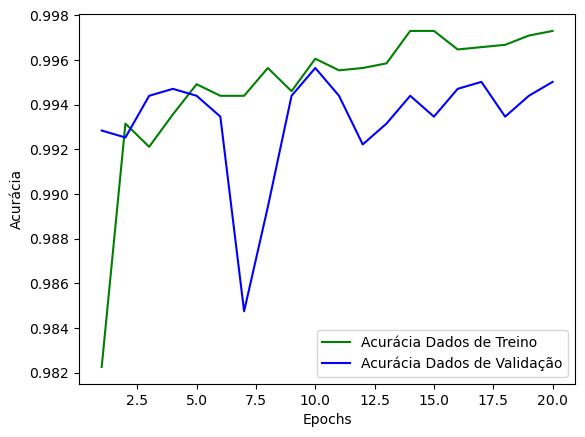

101/101 [==============================] - 3s 27ms/step


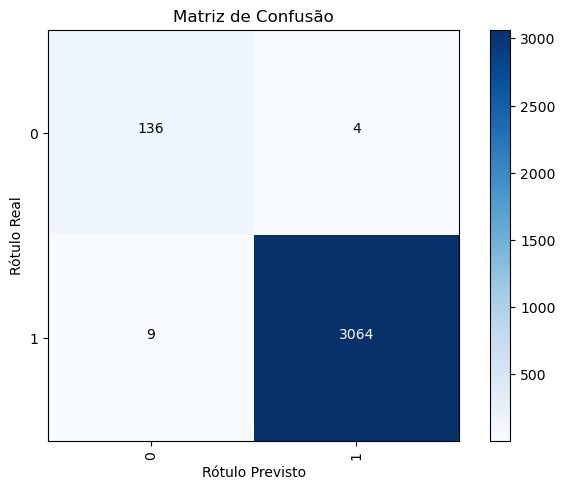

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       140
           1       1.00      1.00      1.00      3073

    accuracy                           1.00      3213
   macro avg       0.97      0.98      0.98      3213
weighted avg       1.00      1.00      1.00      3213

MCC = 0.9524302297994909


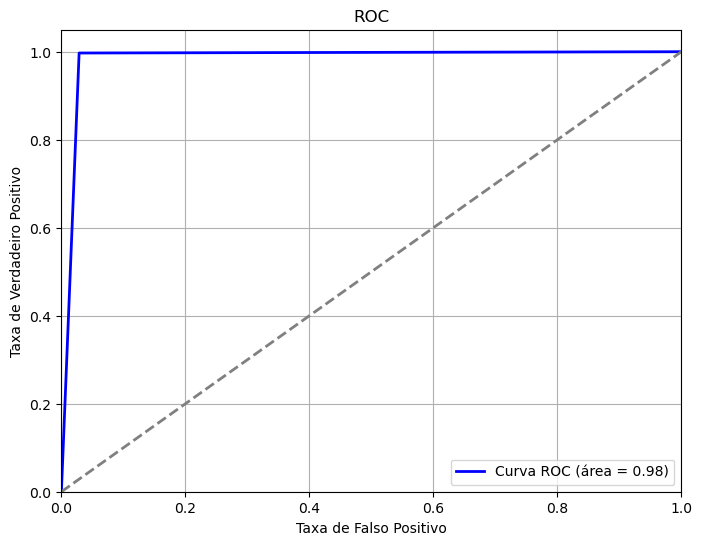

In [8]:
rede_cnn_1d(X,y,6)

Epoch 1/20
302/302 [==============================] - 54s 174ms/step - loss: 0.1382 - accuracy: 0.9751 - val_loss: 0.0251 - val_accuracy: 0.9907
Epoch 2/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0306 - accuracy: 0.9902 - val_loss: 0.0441 - val_accuracy: 0.9894
Epoch 3/20
302/302 [==============================] - 52s 171ms/step - loss: 0.0189 - accuracy: 0.9932 - val_loss: 0.0121 - val_accuracy: 0.9963
Epoch 4/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0191 - accuracy: 0.9930 - val_loss: 0.0147 - val_accuracy: 0.9953
Epoch 5/20
302/302 [==============================] - 52s 172ms/step - loss: 0.0177 - accuracy: 0.9926 - val_loss: 0.0146 - val_accuracy: 0.9960
Epoch 6/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0151 - accuracy: 0.9942 - val_loss: 0.0159 - val_accuracy: 0.9950
Epoch 7/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0142 - accuracy: 0.9950 - val_loss: 0.0121 - val_ac

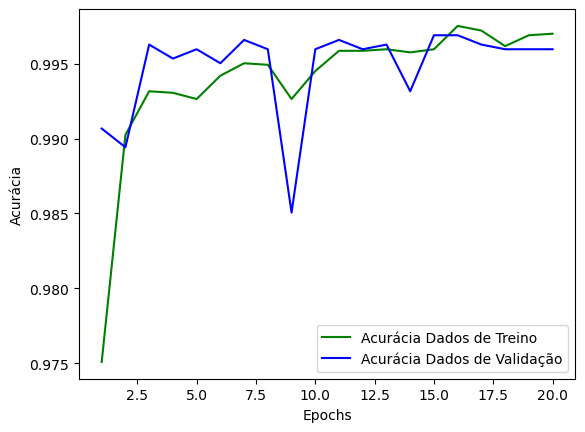

101/101 [==============================] - 3s 26ms/step


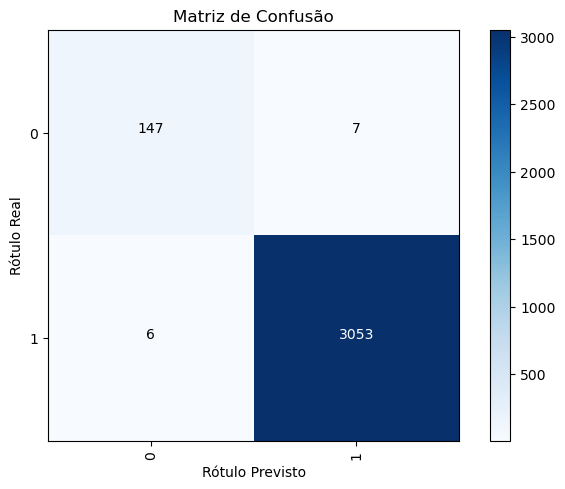

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       154
           1       1.00      1.00      1.00      3059

    accuracy                           1.00      3213
   macro avg       0.98      0.98      0.98      3213
weighted avg       1.00      1.00      1.00      3213

MCC = 0.9555358072881295


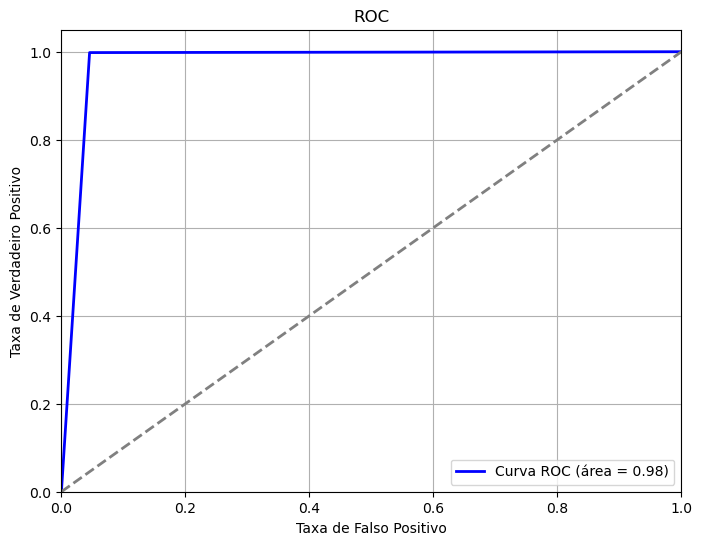

In [9]:
rede_cnn_1d(X,y,7)

Epoch 1/20
302/302 [==============================] - 55s 173ms/step - loss: 0.0650 - accuracy: 0.9801 - val_loss: 0.0314 - val_accuracy: 0.9925
Epoch 2/20
302/302 [==============================] - 54s 180ms/step - loss: 0.0216 - accuracy: 0.9919 - val_loss: 0.0218 - val_accuracy: 0.9925
Epoch 3/20
302/302 [==============================] - 48s 159ms/step - loss: 0.0183 - accuracy: 0.9925 - val_loss: 0.0272 - val_accuracy: 0.9879
Epoch 4/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0165 - accuracy: 0.9944 - val_loss: 0.0167 - val_accuracy: 0.9941
Epoch 5/20
302/302 [==============================] - 52s 171ms/step - loss: 0.0146 - accuracy: 0.9946 - val_loss: 0.0134 - val_accuracy: 0.9944
Epoch 6/20
302/302 [==============================] - 52s 172ms/step - loss: 0.0201 - accuracy: 0.9938 - val_loss: 0.0198 - val_accuracy: 0.9950
Epoch 7/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0138 - accuracy: 0.9947 - val_loss: 0.0177 - val_ac

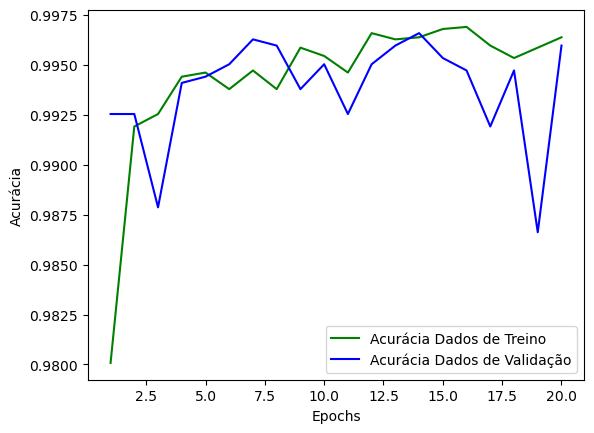

101/101 [==============================] - 3s 28ms/step


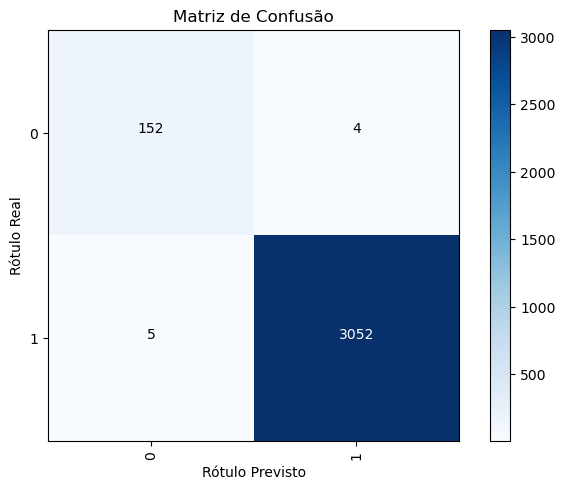

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       156
           1       1.00      1.00      1.00      3057

    accuracy                           1.00      3213
   macro avg       0.98      0.99      0.98      3213
weighted avg       1.00      1.00      1.00      3213

MCC = 0.9697792192284991


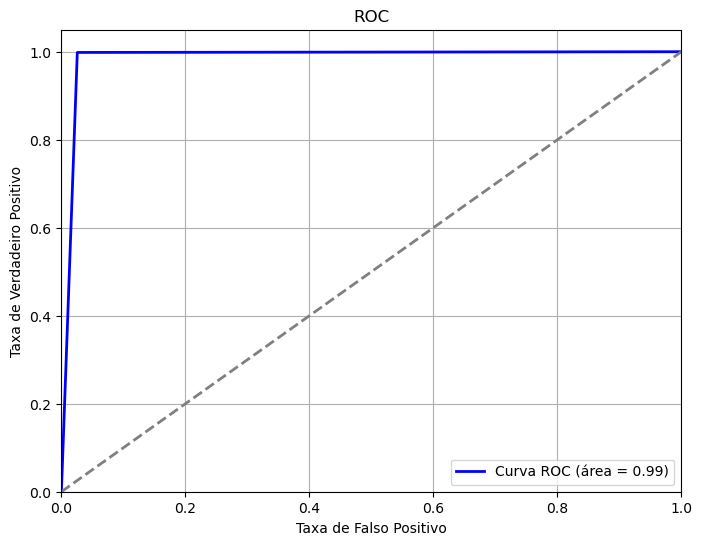

In [10]:
rede_cnn_1d(X,y,8)

Epoch 1/20
302/302 [==============================] - 54s 172ms/step - loss: 0.1132 - accuracy: 0.9719 - val_loss: 0.0270 - val_accuracy: 0.9935
Epoch 2/20
302/302 [==============================] - 55s 181ms/step - loss: 0.0293 - accuracy: 0.9892 - val_loss: 0.0230 - val_accuracy: 0.9944
Epoch 3/20
302/302 [==============================] - 52s 172ms/step - loss: 0.0189 - accuracy: 0.9935 - val_loss: 0.0265 - val_accuracy: 0.9904
Epoch 4/20
302/302 [==============================] - 52s 172ms/step - loss: 0.0172 - accuracy: 0.9936 - val_loss: 0.0235 - val_accuracy: 0.9916
Epoch 5/20
302/302 [==============================] - 54s 180ms/step - loss: 0.0154 - accuracy: 0.9938 - val_loss: 0.0231 - val_accuracy: 0.9935
Epoch 6/20
302/302 [==============================] - 44s 147ms/step - loss: 0.0151 - accuracy: 0.9947 - val_loss: 0.0194 - val_accuracy: 0.9960
Epoch 7/20
302/302 [==============================] - 52s 172ms/step - loss: 0.0144 - accuracy: 0.9952 - val_loss: 0.0312 - val_ac

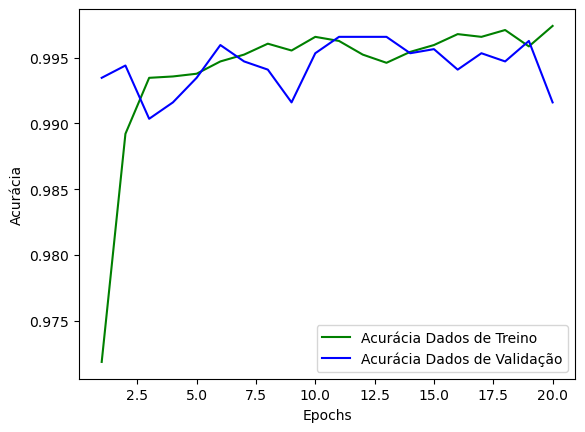

101/101 [==============================] - 3s 29ms/step


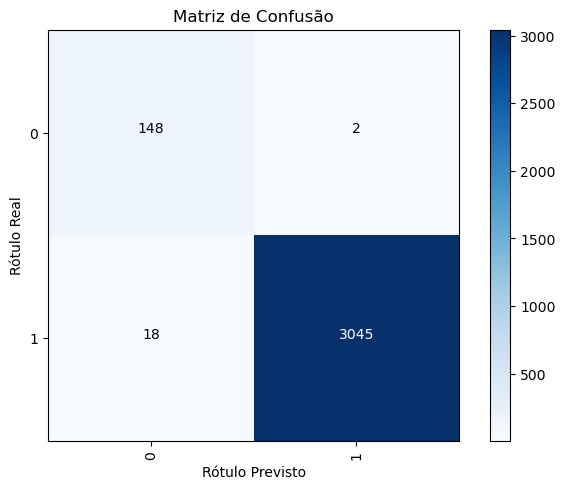

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       150
           1       1.00      0.99      1.00      3063

    accuracy                           0.99      3213
   macro avg       0.95      0.99      0.97      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.9347703299755116


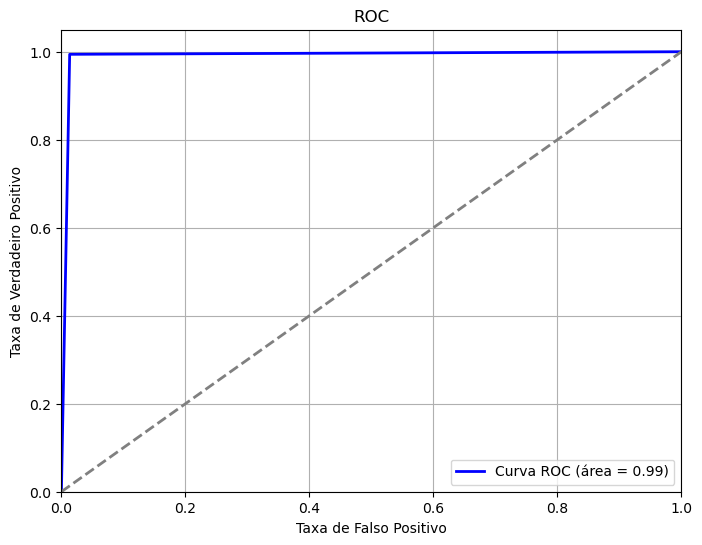

In [11]:
rede_cnn_1d(X,y,9)

Epoch 1/20
302/302 [==============================] - 54s 172ms/step - loss: 0.1101 - accuracy: 0.9737 - val_loss: 0.0484 - val_accuracy: 0.9900
Epoch 2/20
302/302 [==============================] - 52s 172ms/step - loss: 0.0453 - accuracy: 0.9896 - val_loss: 0.0338 - val_accuracy: 0.9953
Epoch 3/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0355 - accuracy: 0.9919 - val_loss: 0.0301 - val_accuracy: 0.9960
Epoch 4/20
302/302 [==============================] - 52s 171ms/step - loss: 0.0330 - accuracy: 0.9918 - val_loss: 0.0382 - val_accuracy: 0.9882
Epoch 5/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0287 - accuracy: 0.9928 - val_loss: 0.0208 - val_accuracy: 0.9978
Epoch 6/20
302/302 [==============================] - 52s 171ms/step - loss: 0.0250 - accuracy: 0.9939 - val_loss: 0.0187 - val_accuracy: 0.9975
Epoch 7/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0226 - accuracy: 0.9932 - val_loss: 0.0188 - val_ac

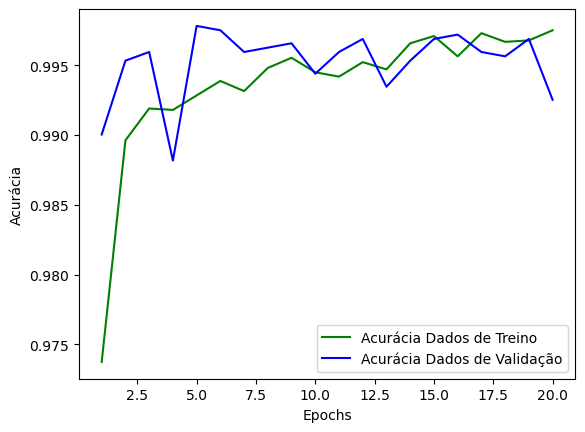

101/101 [==============================] - 3s 28ms/step


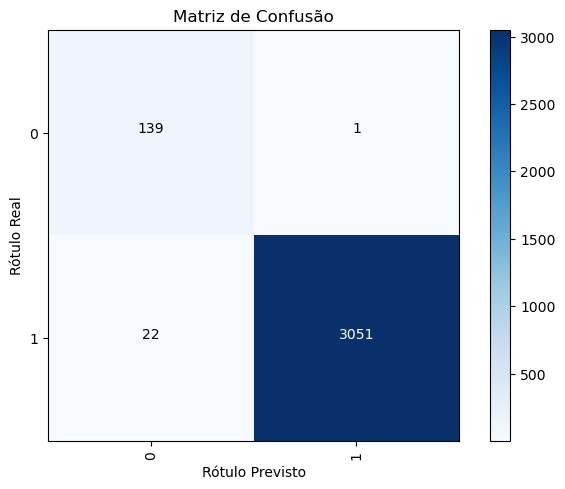

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       140
           1       1.00      0.99      1.00      3073

    accuracy                           0.99      3213
   macro avg       0.93      0.99      0.96      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.9223249930772203


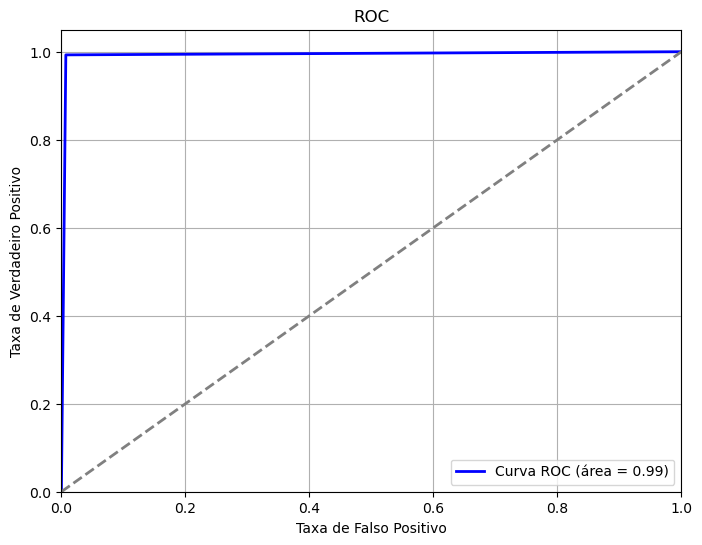

In [12]:
rede_cnn_1d(X,y,10)

Epoch 1/20
302/302 [==============================] - 54s 173ms/step - loss: 0.0988 - accuracy: 0.9783 - val_loss: 0.0533 - val_accuracy: 0.9888
Epoch 2/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0432 - accuracy: 0.9878 - val_loss: 0.0400 - val_accuracy: 0.9894
Epoch 3/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0320 - accuracy: 0.9925 - val_loss: 0.0409 - val_accuracy: 0.9860
Epoch 4/20
302/302 [==============================] - 52s 171ms/step - loss: 0.0294 - accuracy: 0.9929 - val_loss: 0.0295 - val_accuracy: 0.9925
Epoch 5/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0267 - accuracy: 0.9927 - val_loss: 0.0345 - val_accuracy: 0.9916
Epoch 6/20
302/302 [==============================] - 52s 171ms/step - loss: 0.0257 - accuracy: 0.9930 - val_loss: 0.0231 - val_accuracy: 0.9935
Epoch 7/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0229 - accuracy: 0.9935 - val_loss: 0.0272 - val_ac

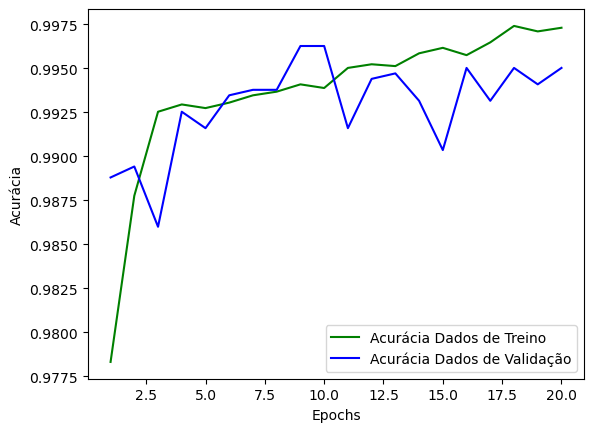

101/101 [==============================] - 3s 28ms/step


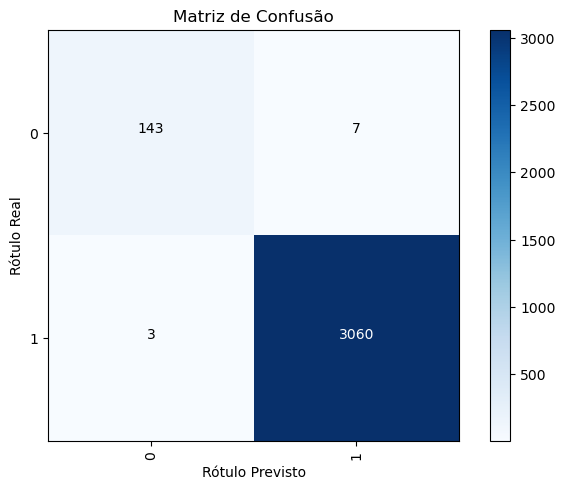

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       150
           1       1.00      1.00      1.00      3063

    accuracy                           1.00      3213
   macro avg       0.99      0.98      0.98      3213
weighted avg       1.00      1.00      1.00      3213

MCC = 0.9646820049049337


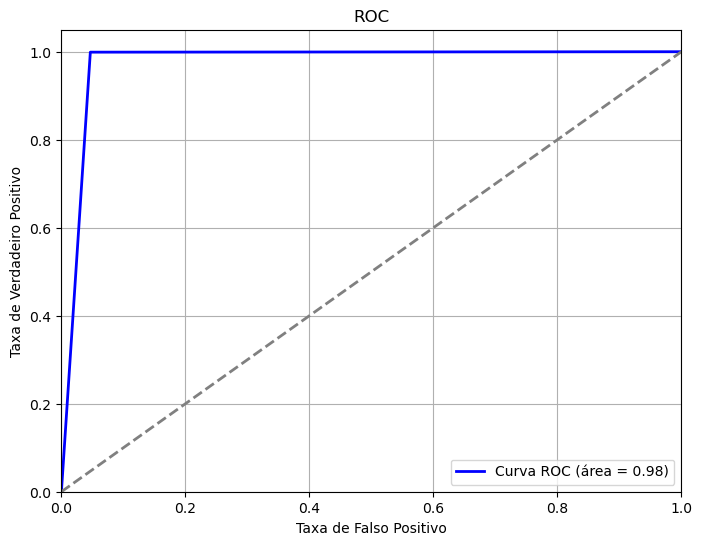

In [13]:
rede_cnn_1d(X,y,11)

Epoch 1/20
302/302 [==============================] - 54s 174ms/step - loss: 0.0659 - accuracy: 0.9825 - val_loss: 0.0154 - val_accuracy: 0.9947
Epoch 2/20
302/302 [==============================] - 52s 171ms/step - loss: 0.0256 - accuracy: 0.9906 - val_loss: 0.0133 - val_accuracy: 0.9947
Epoch 3/20
302/302 [==============================] - 52s 174ms/step - loss: 0.0180 - accuracy: 0.9934 - val_loss: 0.0124 - val_accuracy: 0.9947
Epoch 4/20
302/302 [==============================] - 52s 172ms/step - loss: 0.0180 - accuracy: 0.9934 - val_loss: 0.0130 - val_accuracy: 0.9944
Epoch 5/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0167 - accuracy: 0.9939 - val_loss: 0.0141 - val_accuracy: 0.9947
Epoch 6/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0113 - accuracy: 0.9951 - val_loss: 0.0778 - val_accuracy: 0.9763
Epoch 7/20
302/302 [==============================] - 52s 171ms/step - loss: 0.0142 - accuracy: 0.9944 - val_loss: 0.0159 - val_ac

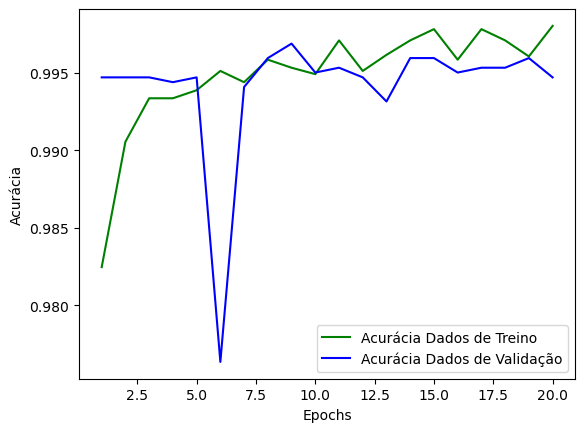

101/101 [==============================] - 3s 28ms/step


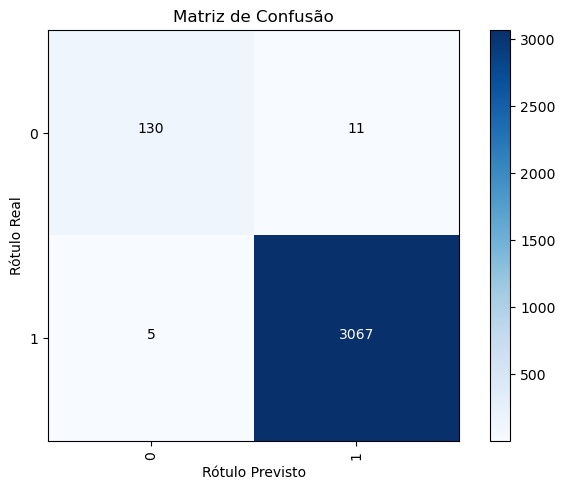

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       141
           1       1.00      1.00      1.00      3072

    accuracy                           1.00      3213
   macro avg       0.98      0.96      0.97      3213
weighted avg       0.99      1.00      0.99      3213

MCC = 0.9396710812094182


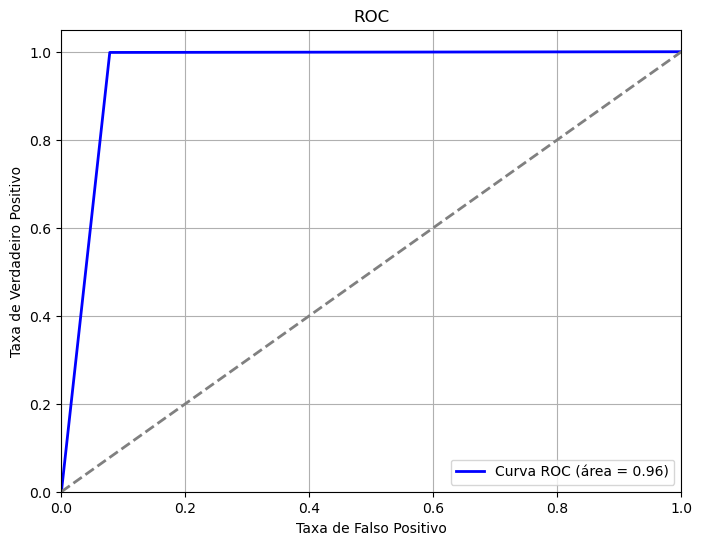

In [14]:
rede_cnn_1d(X,y,12)

Epoch 1/20
302/302 [==============================] - 54s 174ms/step - loss: 0.0875 - accuracy: 0.9755 - val_loss: 0.0431 - val_accuracy: 0.9935
Epoch 2/20
302/302 [==============================] - 52s 172ms/step - loss: 0.0394 - accuracy: 0.9908 - val_loss: 0.0648 - val_accuracy: 0.9941
Epoch 3/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0338 - accuracy: 0.9927 - val_loss: 0.0622 - val_accuracy: 0.9894
Epoch 4/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0309 - accuracy: 0.9929 - val_loss: 0.0305 - val_accuracy: 0.9919
Epoch 5/20
302/302 [==============================] - 52s 172ms/step - loss: 0.0280 - accuracy: 0.9929 - val_loss: 0.0281 - val_accuracy: 0.9919
Epoch 6/20
302/302 [==============================] - 52s 174ms/step - loss: 0.0214 - accuracy: 0.9944 - val_loss: 0.0498 - val_accuracy: 0.9916
Epoch 7/20
302/302 [==============================] - 54s 180ms/step - loss: 0.0202 - accuracy: 0.9954 - val_loss: 0.0539 - val_ac

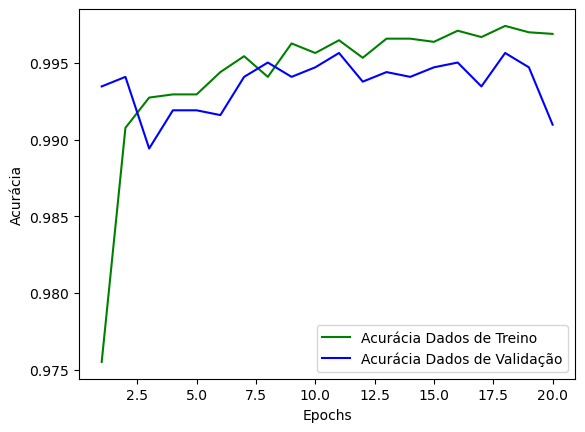

101/101 [==============================] - 3s 26ms/step


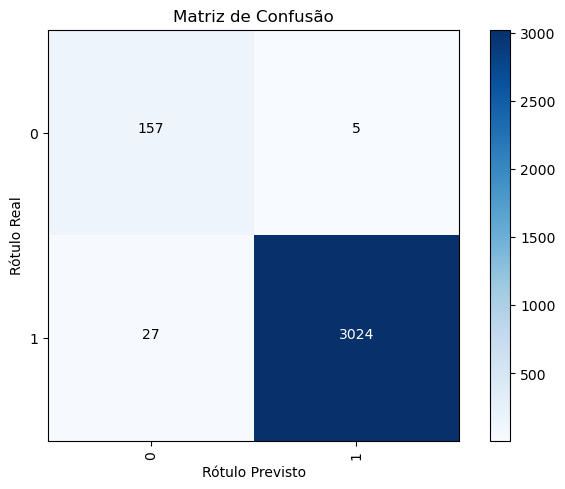

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       162
           1       1.00      0.99      0.99      3051

    accuracy                           0.99      3213
   macro avg       0.93      0.98      0.95      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.9043171581224456


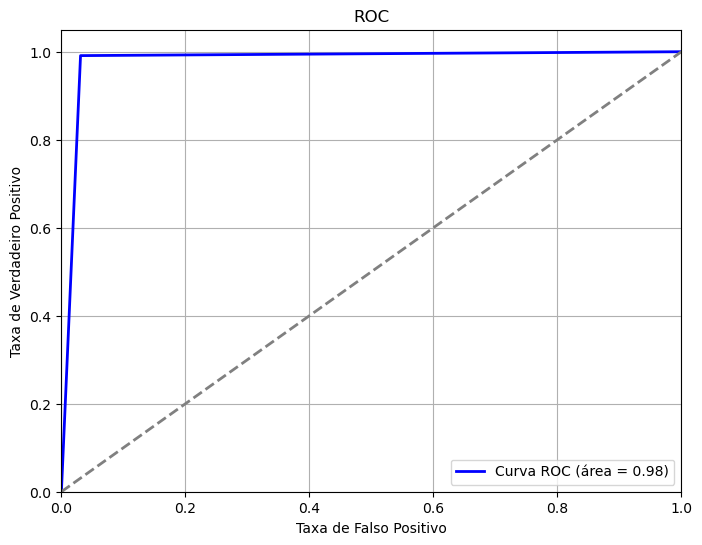

In [15]:
rede_cnn_1d(X,y,13)

Epoch 1/20
302/302 [==============================] - 55s 177ms/step - loss: 0.0739 - accuracy: 0.9853 - val_loss: 0.0216 - val_accuracy: 0.9907
Epoch 2/20
302/302 [==============================] - 53s 174ms/step - loss: 0.0254 - accuracy: 0.9897 - val_loss: 0.0185 - val_accuracy: 0.9956
Epoch 3/20
302/302 [==============================] - 55s 181ms/step - loss: 0.0212 - accuracy: 0.9928 - val_loss: 0.0157 - val_accuracy: 0.9950
Epoch 4/20
302/302 [==============================] - 53s 175ms/step - loss: 0.0186 - accuracy: 0.9928 - val_loss: 0.0172 - val_accuracy: 0.9953
Epoch 5/20
302/302 [==============================] - 49s 161ms/step - loss: 0.0144 - accuracy: 0.9940 - val_loss: 0.0168 - val_accuracy: 0.9963
Epoch 6/20
302/302 [==============================] - 27s 89ms/step - loss: 0.0124 - accuracy: 0.9950 - val_loss: 0.0151 - val_accuracy: 0.9963
Epoch 7/20
302/302 [==============================] - 33s 110ms/step - loss: 0.0129 - accuracy: 0.9951 - val_loss: 0.0400 - val_acc

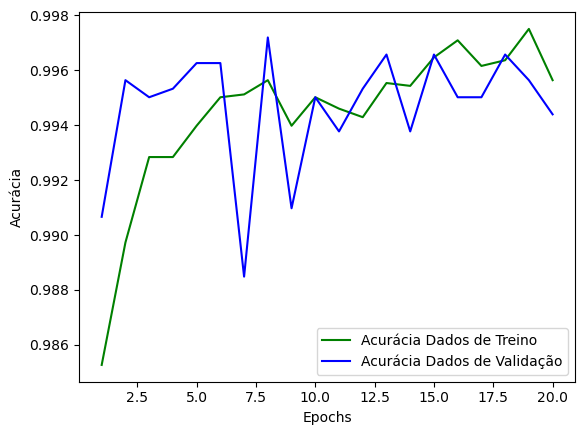

101/101 [==============================] - 3s 29ms/step


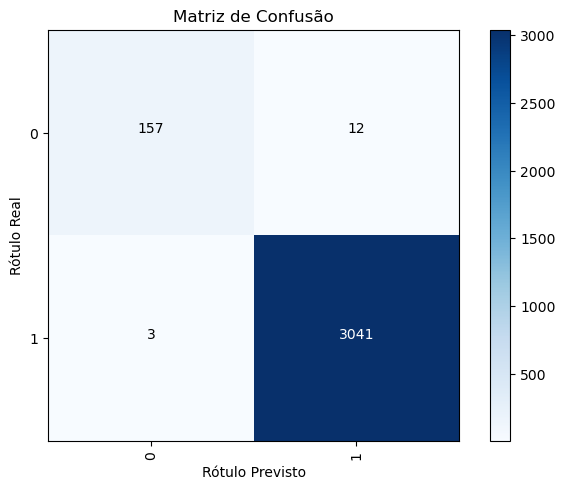

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       169
           1       1.00      1.00      1.00      3044

    accuracy                           1.00      3213
   macro avg       0.99      0.96      0.98      3213
weighted avg       1.00      1.00      1.00      3213

MCC = 0.9523448871561627


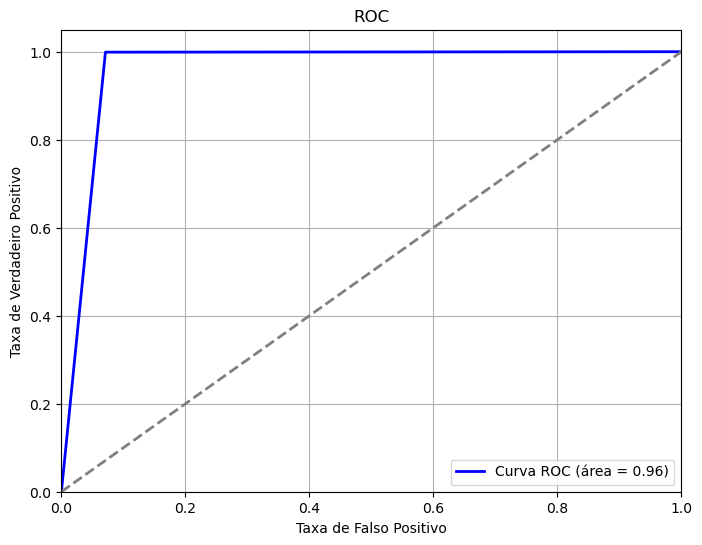

In [16]:
rede_cnn_1d(X,y,14)

Epoch 1/20
302/302 [==============================] - 54s 173ms/step - loss: 0.0598 - accuracy: 0.9823 - val_loss: 0.0393 - val_accuracy: 0.9810
Epoch 2/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0246 - accuracy: 0.9916 - val_loss: 0.0106 - val_accuracy: 0.9969
Epoch 3/20
302/302 [==============================] - 52s 172ms/step - loss: 0.0200 - accuracy: 0.9934 - val_loss: 0.0116 - val_accuracy: 0.9972
Epoch 4/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0161 - accuracy: 0.9927 - val_loss: 0.0115 - val_accuracy: 0.9960
Epoch 5/20
302/302 [==============================] - 52s 171ms/step - loss: 0.0133 - accuracy: 0.9945 - val_loss: 0.0090 - val_accuracy: 0.9956
Epoch 6/20
302/302 [==============================] - 52s 172ms/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.0078 - val_accuracy: 0.9969
Epoch 7/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0149 - accuracy: 0.9947 - val_loss: 0.0098 - val_ac

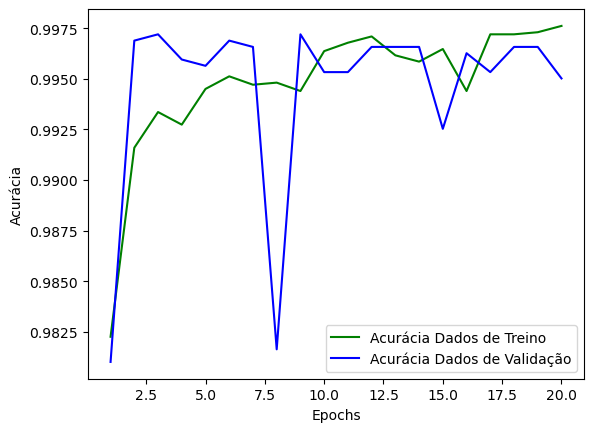

101/101 [==============================] - 3s 28ms/step


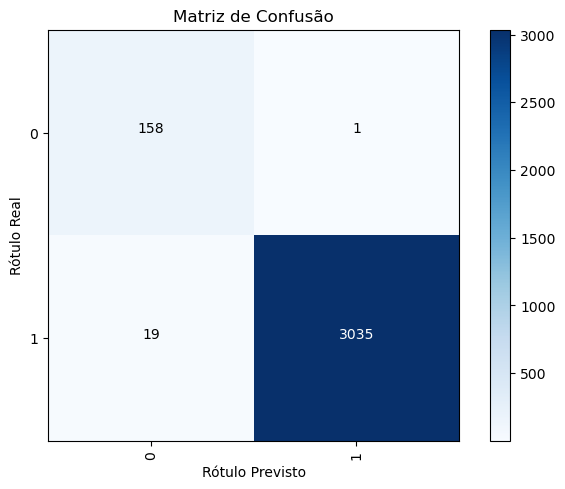

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       159
           1       1.00      0.99      1.00      3054

    accuracy                           0.99      3213
   macro avg       0.95      0.99      0.97      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.9387025098061997


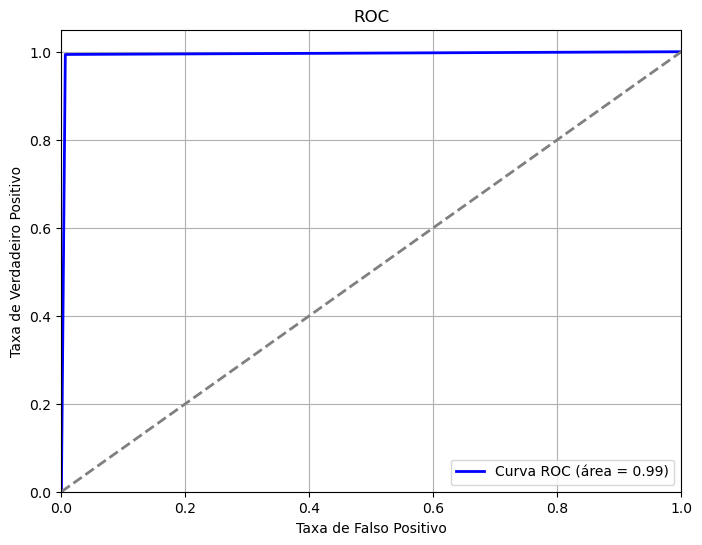

In [17]:
rede_cnn_1d(X,y,15)

Epoch 1/20
302/302 [==============================] - 54s 174ms/step - loss: 0.0740 - accuracy: 0.9830 - val_loss: 0.0213 - val_accuracy: 0.9916
Epoch 2/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0239 - accuracy: 0.9917 - val_loss: 0.0134 - val_accuracy: 0.9941
Epoch 3/20
302/302 [==============================] - 55s 181ms/step - loss: 0.0195 - accuracy: 0.9922 - val_loss: 0.0119 - val_accuracy: 0.9947
Epoch 4/20
302/302 [==============================] - 52s 174ms/step - loss: 0.0199 - accuracy: 0.9925 - val_loss: 0.0531 - val_accuracy: 0.9813
Epoch 5/20
302/302 [==============================] - 52s 174ms/step - loss: 0.0144 - accuracy: 0.9947 - val_loss: 0.0190 - val_accuracy: 0.9941
Epoch 6/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0156 - accuracy: 0.9937 - val_loss: 0.0235 - val_accuracy: 0.9922
Epoch 7/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0141 - accuracy: 0.9947 - val_loss: 0.0149 - val_ac

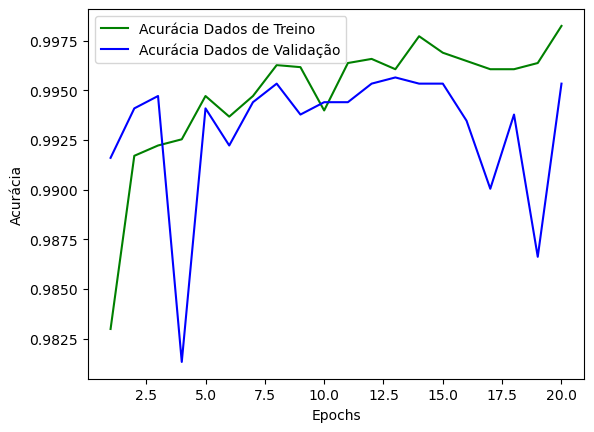

101/101 [==============================] - 3s 28ms/step


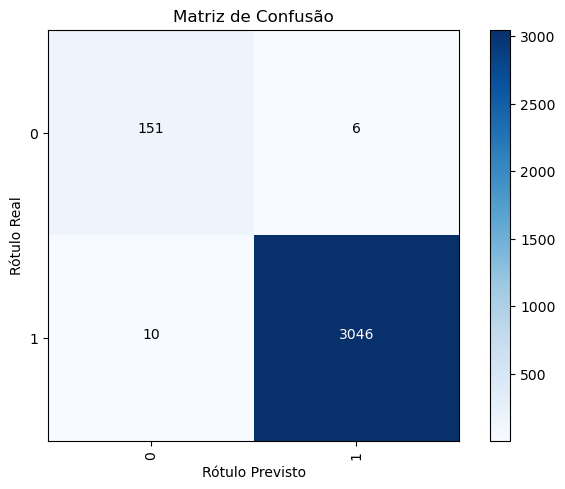

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       157
           1       1.00      1.00      1.00      3056

    accuracy                           1.00      3213
   macro avg       0.97      0.98      0.97      3213
weighted avg       1.00      1.00      1.00      3213

MCC = 0.9471493924607216


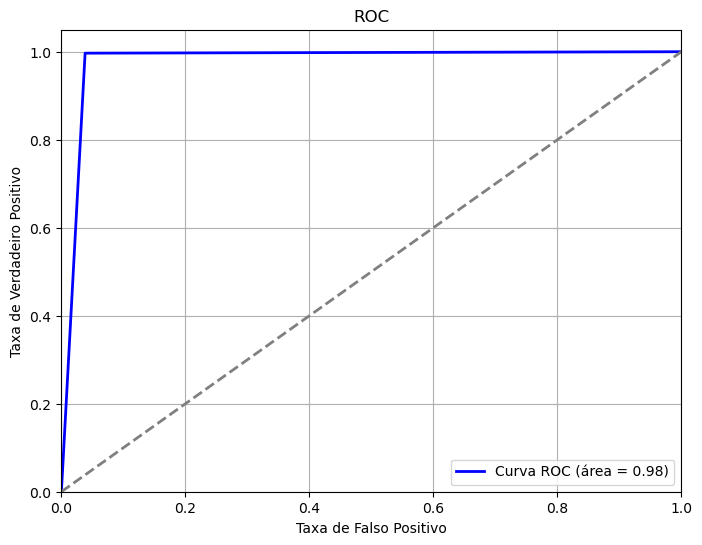

In [18]:
rede_cnn_1d(X,y,16)

Epoch 1/20
302/302 [==============================] - 54s 173ms/step - loss: 0.0892 - accuracy: 0.9743 - val_loss: 0.0616 - val_accuracy: 0.9829
Epoch 2/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0417 - accuracy: 0.9910 - val_loss: 0.0455 - val_accuracy: 0.9900
Epoch 3/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0335 - accuracy: 0.9929 - val_loss: 0.0335 - val_accuracy: 0.9941
Epoch 4/20
302/302 [==============================] - 52s 172ms/step - loss: 0.0277 - accuracy: 0.9943 - val_loss: 0.0485 - val_accuracy: 0.9910
Epoch 5/20
302/302 [==============================] - 55s 182ms/step - loss: 0.0237 - accuracy: 0.9942 - val_loss: 0.0292 - val_accuracy: 0.9910
Epoch 6/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0208 - accuracy: 0.9960 - val_loss: 0.0254 - val_accuracy: 0.9928
Epoch 7/20
302/302 [==============================] - 52s 174ms/step - loss: 0.0215 - accuracy: 0.9941 - val_loss: 0.0240 - val_ac

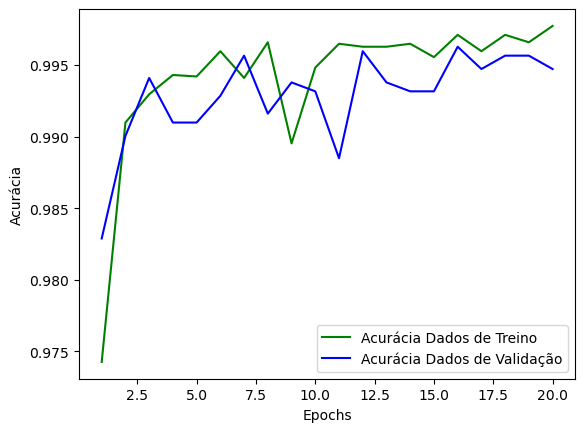

101/101 [==============================] - 3s 28ms/step


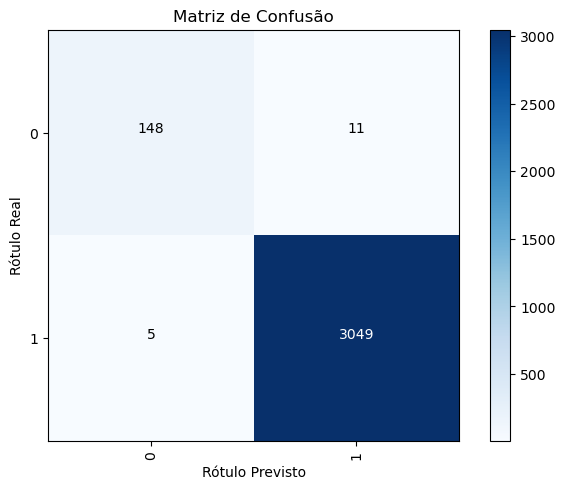

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       159
           1       1.00      1.00      1.00      3054

    accuracy                           1.00      3213
   macro avg       0.98      0.96      0.97      3213
weighted avg       0.99      1.00      0.99      3213

MCC = 0.9462953286080397


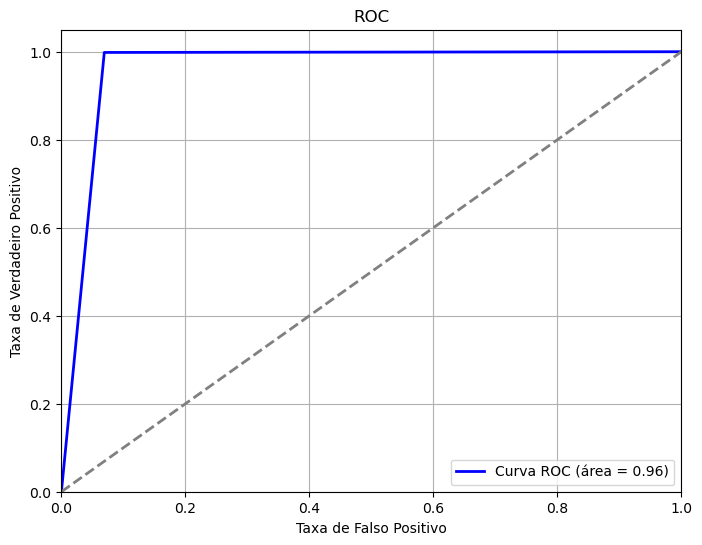

In [19]:
rede_cnn_1d(X,y,17)

Epoch 1/20
302/302 [==============================] - 56s 181ms/step - loss: 0.0742 - accuracy: 0.9801 - val_loss: 0.0343 - val_accuracy: 0.9851
Epoch 2/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0312 - accuracy: 0.9886 - val_loss: 0.0203 - val_accuracy: 0.9935
Epoch 3/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0202 - accuracy: 0.9922 - val_loss: 0.0068 - val_accuracy: 0.9981
Epoch 4/20
302/302 [==============================] - 52s 172ms/step - loss: 0.0214 - accuracy: 0.9917 - val_loss: 0.0094 - val_accuracy: 0.9981
Epoch 5/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0201 - accuracy: 0.9930 - val_loss: 0.0148 - val_accuracy: 0.9950
Epoch 6/20
302/302 [==============================] - 52s 172ms/step - loss: 0.0178 - accuracy: 0.9939 - val_loss: 0.0204 - val_accuracy: 0.9932
Epoch 7/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0166 - accuracy: 0.9940 - val_loss: 0.0127 - val_ac

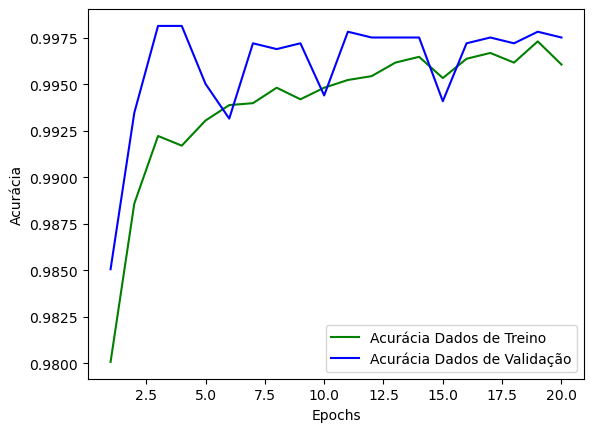

101/101 [==============================] - 3s 28ms/step


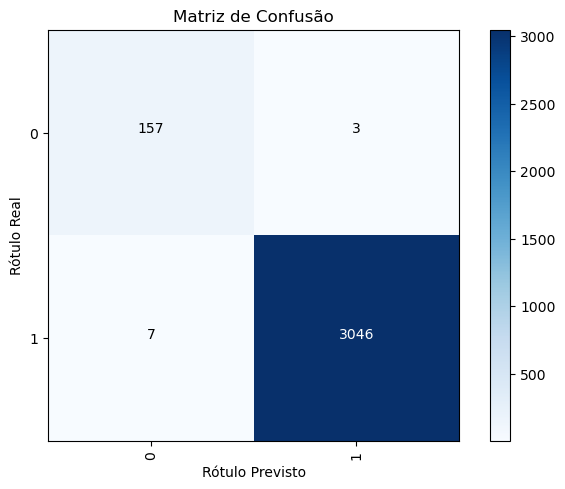

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       160
           1       1.00      1.00      1.00      3053

    accuracy                           1.00      3213
   macro avg       0.98      0.99      0.98      3213
weighted avg       1.00      1.00      1.00      3213

MCC = 0.9675790362394648


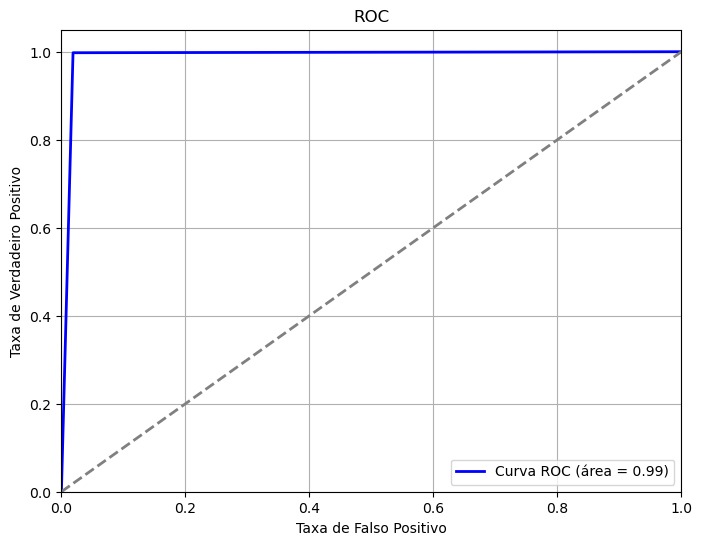

In [20]:
rede_cnn_1d(X,y,18)

Epoch 1/20
302/302 [==============================] - 54s 173ms/step - loss: 0.0775 - accuracy: 0.9775 - val_loss: 0.0425 - val_accuracy: 0.9941
Epoch 2/20
302/302 [==============================] - 52s 172ms/step - loss: 0.0424 - accuracy: 0.9868 - val_loss: 0.0367 - val_accuracy: 0.9910
Epoch 3/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0357 - accuracy: 0.9914 - val_loss: 0.0384 - val_accuracy: 0.9916
Epoch 4/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0346 - accuracy: 0.9916 - val_loss: 0.0257 - val_accuracy: 0.9947
Epoch 5/20
302/302 [==============================] - 52s 172ms/step - loss: 0.0241 - accuracy: 0.9940 - val_loss: 0.0213 - val_accuracy: 0.9960
Epoch 6/20
302/302 [==============================] - 52s 172ms/step - loss: 0.0252 - accuracy: 0.9926 - val_loss: 0.0192 - val_accuracy: 0.9956
Epoch 7/20
302/302 [==============================] - 52s 172ms/step - loss: 0.0200 - accuracy: 0.9950 - val_loss: 0.0316 - val_ac

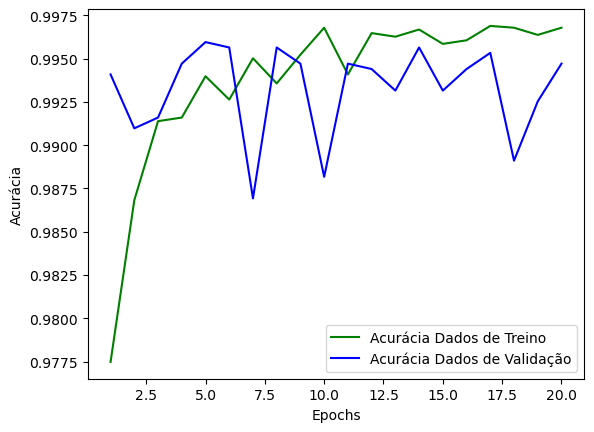

101/101 [==============================] - 3s 28ms/step


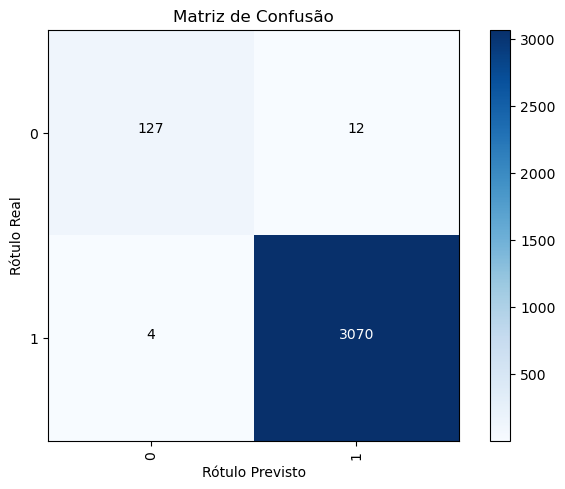

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       139
           1       1.00      1.00      1.00      3074

    accuracy                           1.00      3213
   macro avg       0.98      0.96      0.97      3213
weighted avg       0.99      1.00      0.99      3213

MCC = 0.9385930405702619


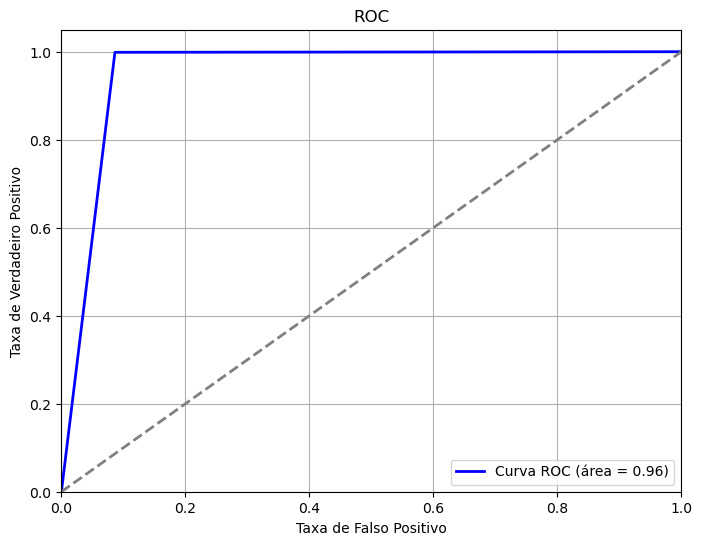

In [21]:
rede_cnn_1d(X,y,19)

Epoch 1/20
302/302 [==============================] - 54s 174ms/step - loss: 0.0677 - accuracy: 0.9840 - val_loss: 0.0149 - val_accuracy: 0.9932
Epoch 2/20
302/302 [==============================] - 54s 179ms/step - loss: 0.0233 - accuracy: 0.9917 - val_loss: 0.0183 - val_accuracy: 0.9944
Epoch 3/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0162 - accuracy: 0.9944 - val_loss: 0.0188 - val_accuracy: 0.9941
Epoch 4/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0181 - accuracy: 0.9927 - val_loss: 0.0214 - val_accuracy: 0.9935
Epoch 5/20
302/302 [==============================] - 52s 171ms/step - loss: 0.0173 - accuracy: 0.9940 - val_loss: 0.0160 - val_accuracy: 0.9947
Epoch 6/20
302/302 [==============================] - 52s 173ms/step - loss: 0.0145 - accuracy: 0.9952 - val_loss: 0.0214 - val_accuracy: 0.9935
Epoch 7/20
302/302 [==============================] - 52s 172ms/step - loss: 0.0118 - accuracy: 0.9955 - val_loss: 0.0796 - val_ac

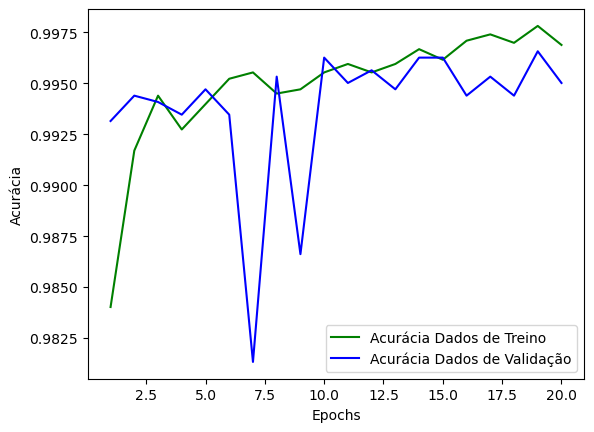

101/101 [==============================] - 3s 28ms/step


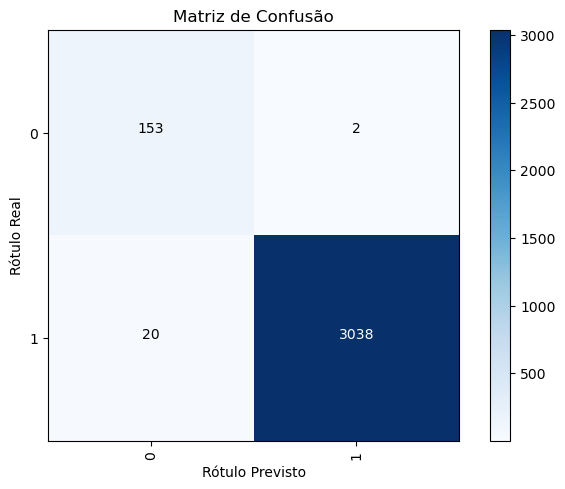

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       155
           1       1.00      0.99      1.00      3058

    accuracy                           0.99      3213
   macro avg       0.94      0.99      0.96      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.9308879147845593


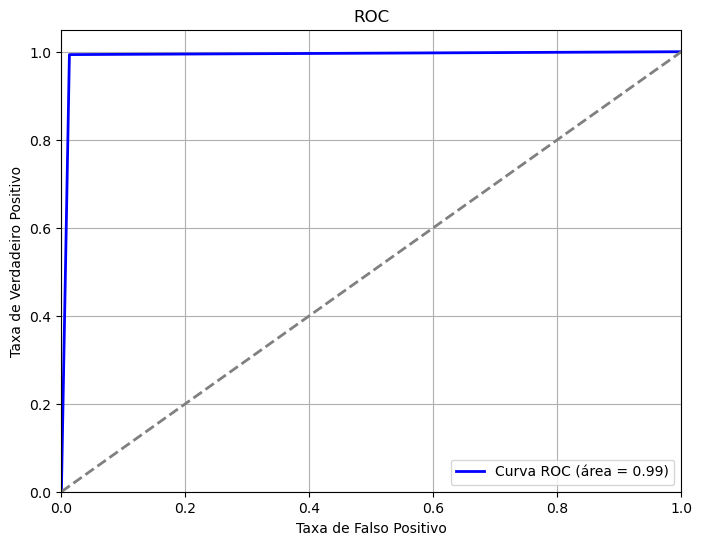

In [22]:
rede_cnn_1d(X,y,20)